<a href="https://colab.research.google.com/github/gaiah-11/Repozitorij/blob/main/Decision_tree_seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cilj - na temelju medicinskih i demografskih podataka predvidjeti dijagnozu pacijenta za Alzheimerovu bolest,

In [ ]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#import data
#predobrada podataka
df = pd.read_csv("alzheimers_disease_data.csv", index_col=0)
df = df.drop(df.columns[-1], axis=1)

In [ ]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


In [ ]:
df.tail()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1
6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1
6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1
6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1
6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,9.878711,0,0,0,0,0,0,166,78,283.396797,92.200064,81.920043,217.396873,11.114777,6.307543,0,1,8.327563,0,1,0,0,1,0


In [ ]:
y = df.iloc[:,-1]
y

,Diagnosis
PatientID,
4751,0
4752,0
4753,0
4754,0
4755,0
...,...
6895,1
6896,1
6897,1


In [ ]:
x = df.iloc[:,:-1]
x

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0
4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1
4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0
4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0
4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0
6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0
6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0


In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

df.groupby("Diagnosis").describe()
#glavne diferencijacijske varijable nađene deskriptivnom statistikom: 	MMSE, 	ADL, MemoryComplaints, FunctionalAssesment

Age                                                     Gender  \
            count       mean       std   min   25%   50%   75%   max   count   
Diagnosis                                                                      
0          1389.0  74.945284  8.904709  60.0  67.0  75.0  83.0  90.0  1389.0   
1           760.0  74.842105  9.149977  60.0  67.0  75.0  83.0  90.0   760.0   

                                                       Ethnicity            \
               mean       std  min  25%  50%  75%  max     count      mean   
Diagnosis                                                                    
0          0.514039  0.499983  0.0  0.0  1.0  1.0  1.0    1389.0  0.708423   
1          0.492105  0.500267  0.0  0.0  0.0  1.0  1.0     760.0  0.677632   

                                             EducationLevel            \
                std  min  25%  50%  75%  max          count      mean   
Diagnosis                                                               
0          1.002487  0.0  0.0  0.0  1.0  3.0         1389.0  1.316055   
1          0.984745  0.0  0.0  0.0  1.0  3.0          760.0  1.232895   

                                                 BMI                       \
                std  min  25%  50%  75%  max   count       mean       std   
Diagnosis                                                                   
0          0.904779  0.0  1.0  1.0  2.0  3.0  1389.0  27.515092  7.171293   
1          0.902184  0.0  1.0  1.0  2.0  3.0   760.0  27.912670  7.298765   

                                                                 Smoking  \
                 min        25%        50%        75%        max   count   
Diagnosis                                                                  
0          15.008851  21.538994  27.560758  33.590817  39.988513  1389.0   
1          15.018240  21.684882  28.004793  34.449386  39.992767   760.0   

                                                       AlcoholConsumption  \
               mean       std  min  25%  50%  75%  max              count   
Diagnosis                                                                   
0          0.290137  0.453989  0.0  0.0  0.0  1.0  1.0             1389.0   
1          0.285526  0.451962  0.0  0.0  0.0  1.0  1.0              760.0   

                                                                         \
                mean       std       min       25%       50%        75%   
Diagnosis                                                                 
0          10.071880  5.753469  0.002003  5.310439  9.967224  15.095018   
1           9.980156  5.769338  0.065286  4.802623  9.860342  15.190361   

                     PhysicalActivity                                         \
                 max            count     mean       std       min       25%   
Diagnosis                                                                      
0          19.989293           1389.0  4.90764  2.869635  0.003616  2.524451   
1          19.988291            760.0  4.94316  2.836046  0.019957  2.632883   

                                        DietQuality                      \
                50%       75%       max       count      mean       std   
Diagnosis                                                                 
0          4.733116  7.455434  9.987429      1389.0  4.974839  2.908802   
1          4.845318  7.374699  9.985069       760.0  5.026581  2.911135   

                                                            SleepQuality  \
                min       25%       50%       75%       max        count   
Diagnosis                                                                  
0          0.009385  2.354424  5.066293  7.519704  9.998346       1389.0   
1          0.019940  2.596171  5.082541  7.577309  9.971204        760.0   

                                                                       \
               mean       std       min       25%       50%       75%   
Diagnosis              

In [ ]:
#provjera nedostajućih vrijednosti
df.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0


###Splitting the dataset


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
x_train.shape, x_test.shape
#x_test 25% ukupnog

((1611, 32), (538, 32))

###Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[ 1.42225683,  0.97244649, -0.69166334, ...,  2.38424984,
        -0.43466066, -0.66211242],
       [-1.46205853, -1.02833422, -0.69166334, ..., -0.41941913,
        -0.43466066, -0.66211242],
       [ 0.20196956,  0.97244649, -0.69166334, ...,  2.38424984,
        -0.43466066, -0.66211242],
       ...,
       [-1.12925291, -1.02833422,  1.32694109, ..., -0.41941913,
        -0.43466066, -0.66211242],
       [ 1.20038641, -1.02833422,  2.3362433 , ..., -0.41941913,
        -0.43466066,  1.51031754],
       [-0.9073825 ,  0.97244649, -0.69166334, ..., -0.41941913,
        -0.43466066, -0.66211242]])

In [ ]:
pd.DataFrame(x_test, columns=x.columns).describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,-0.119907,-0.061414,0.049367,-0.033528,0.109003,-0.006652,-0.054670,0.126629,0.031760,-0.042082,-0.009631,0.052873,-0.021459,-0.024044,0.117550,0.048558,-0.044481,-0.010562,-0.024517,0.008393,0.036401,0.071824,-0.017759,0.030252,0.012822,-0.095804,0.060510,0.097502,0.012821,0.013117,-0.002503,-0.028151
std,0.983812,1.000761,1.020508,1.004942,0.982711,0.997809,0.989362,1.004299,0.974879,1.012384,0.995400,1.053181,0.979737,0.982703,1.157628,1.047762,0.956637,0.989552,0.974029,0.942333,0.983467,0.991740,0.976962,1.001087,1.010102,0.905595,1.013781,1.068792,1.012873,1.013662,0.998588,0.988507
min,-1.683929,-1.028334,-0.691663,-1.432755,-1.710835,-0.637955,-1.746867,-1.691502,-1.693627,-1.741319,-0.582368,-0.402911,-0.424523,-0.504651,-0.303650,-0.411200,-1.699082,-1.694871,-1.759305,-1.678092,-1.686815,-1.707976,-1.707196,-1.744624,-0.510454,-0.445714,-1.679065,-0.493007,-0.431629,-0.419419,-0.434661,-0.662112
25%,-0.907383,-1.028334,-0.691663,-0.325720,-0.680253,-0.637955,-0.919259,-0.685946,-0.821989,-0.934447,-0.582368,-0.402911,-0.424523,-0.504651,-0.303650,-0.411200,-0.860157,-0.844444,-0.779932,-0.745309,-0.825057,-0.844790,-0.863771,-0.842799,-0.510454,-0.445714,-0.802055,-0.493007,-0.431629,-0.419419,-0.434661,-0.662112
50%,-0.241771,-1.028334,-0.691663,-0.325720,0.145942,-0.637955,-0.086215,0.073266,0.049063,0.017458,-0.582368,-0.402911,-0.424523,-0.504651,-0.303650,-0.411200,-0.059365,0.005983,-0.052888,0.028679,0.073980,0.157802,0.014848,0.080525,-0.510454,-0.445714,0.049743,-0.493007,-0.431629,-0.419419,-0.434661,-0.662112
75%,0.756646,0.972446,0.317639,0.781315,0.974190,1.567508,0.734819,1.007184,0.887734,0.826565,-0.582368,-0.402911,-0.424523,-0.504651,-0.303650,-0.411200,0.770026,0.856410,0.818207,0.801492,0.848502,0.873913,0.807733,0.909028,-0.510454,-0.445714,0.969307,-0.493007,-0.431629,-0.419419,-0.434661,1.510318
max,1.644127,0.972446,2.336243,1.888351,1.706387,1.567508,1.710080,1.809468,1.707615,1.663110,1.717128,2.481935,2.355585,1.981566,3.293264,2.431905,1.694750,1.650141,1.738403,1.721485,1.751085,1.697971,1.754458,1.706415,1.959040,2.243593,1.722357,2.028370,2.316806,2.384250,2.300645,1.510318


###Decision Tree

In [ ]:
tree= DecisionTreeClassifier(criterion='gini', random_state=0, max_depth = 4, class_weight= 'balanced')

In [ ]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=0)

[Text(0.49107142857142855, 0.9, 'ADL <= 0.034\ngini = 0.5\nsamples = 1611\nvalue = [805.5, 805.5]'),
 Text(0.26785714285714285, 0.7, 'MMSE <= 1.063\ngini = 0.439\nsamples = 806\nvalue = [292.138, 607.683]'),
 Text(0.3794642857142857, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'FunctionalAssessment <= -0.019\ngini = 0.346\nsamples = 644\nvalue = [171.891, 599.144]'),
 Text(0.07142857142857142, 0.3, 'DietQuality <= -1.687\ngini = 0.051\nsamples = 338\nvalue = [12.333, 458.253]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0.771, 0.0]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.048\nsamples = 337\nvalue = [11.562, 458.253]'),
 Text(0.21428571428571427, 0.3, 'MemoryComplaints <= 0.724\ngini = 0.498\nsamples = 306\nvalue = [159.558, 140.891]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.378\nsamples = 239\nvalue = [155.704, 52.656]'),
 Text(0.25, 0.1, 'gini = 0.08\nsamples = 67\nvalue = [3.854, 88.235]'),
 Text(0.39285714285714285, 0.5, 'FunctionalAssessment <= 

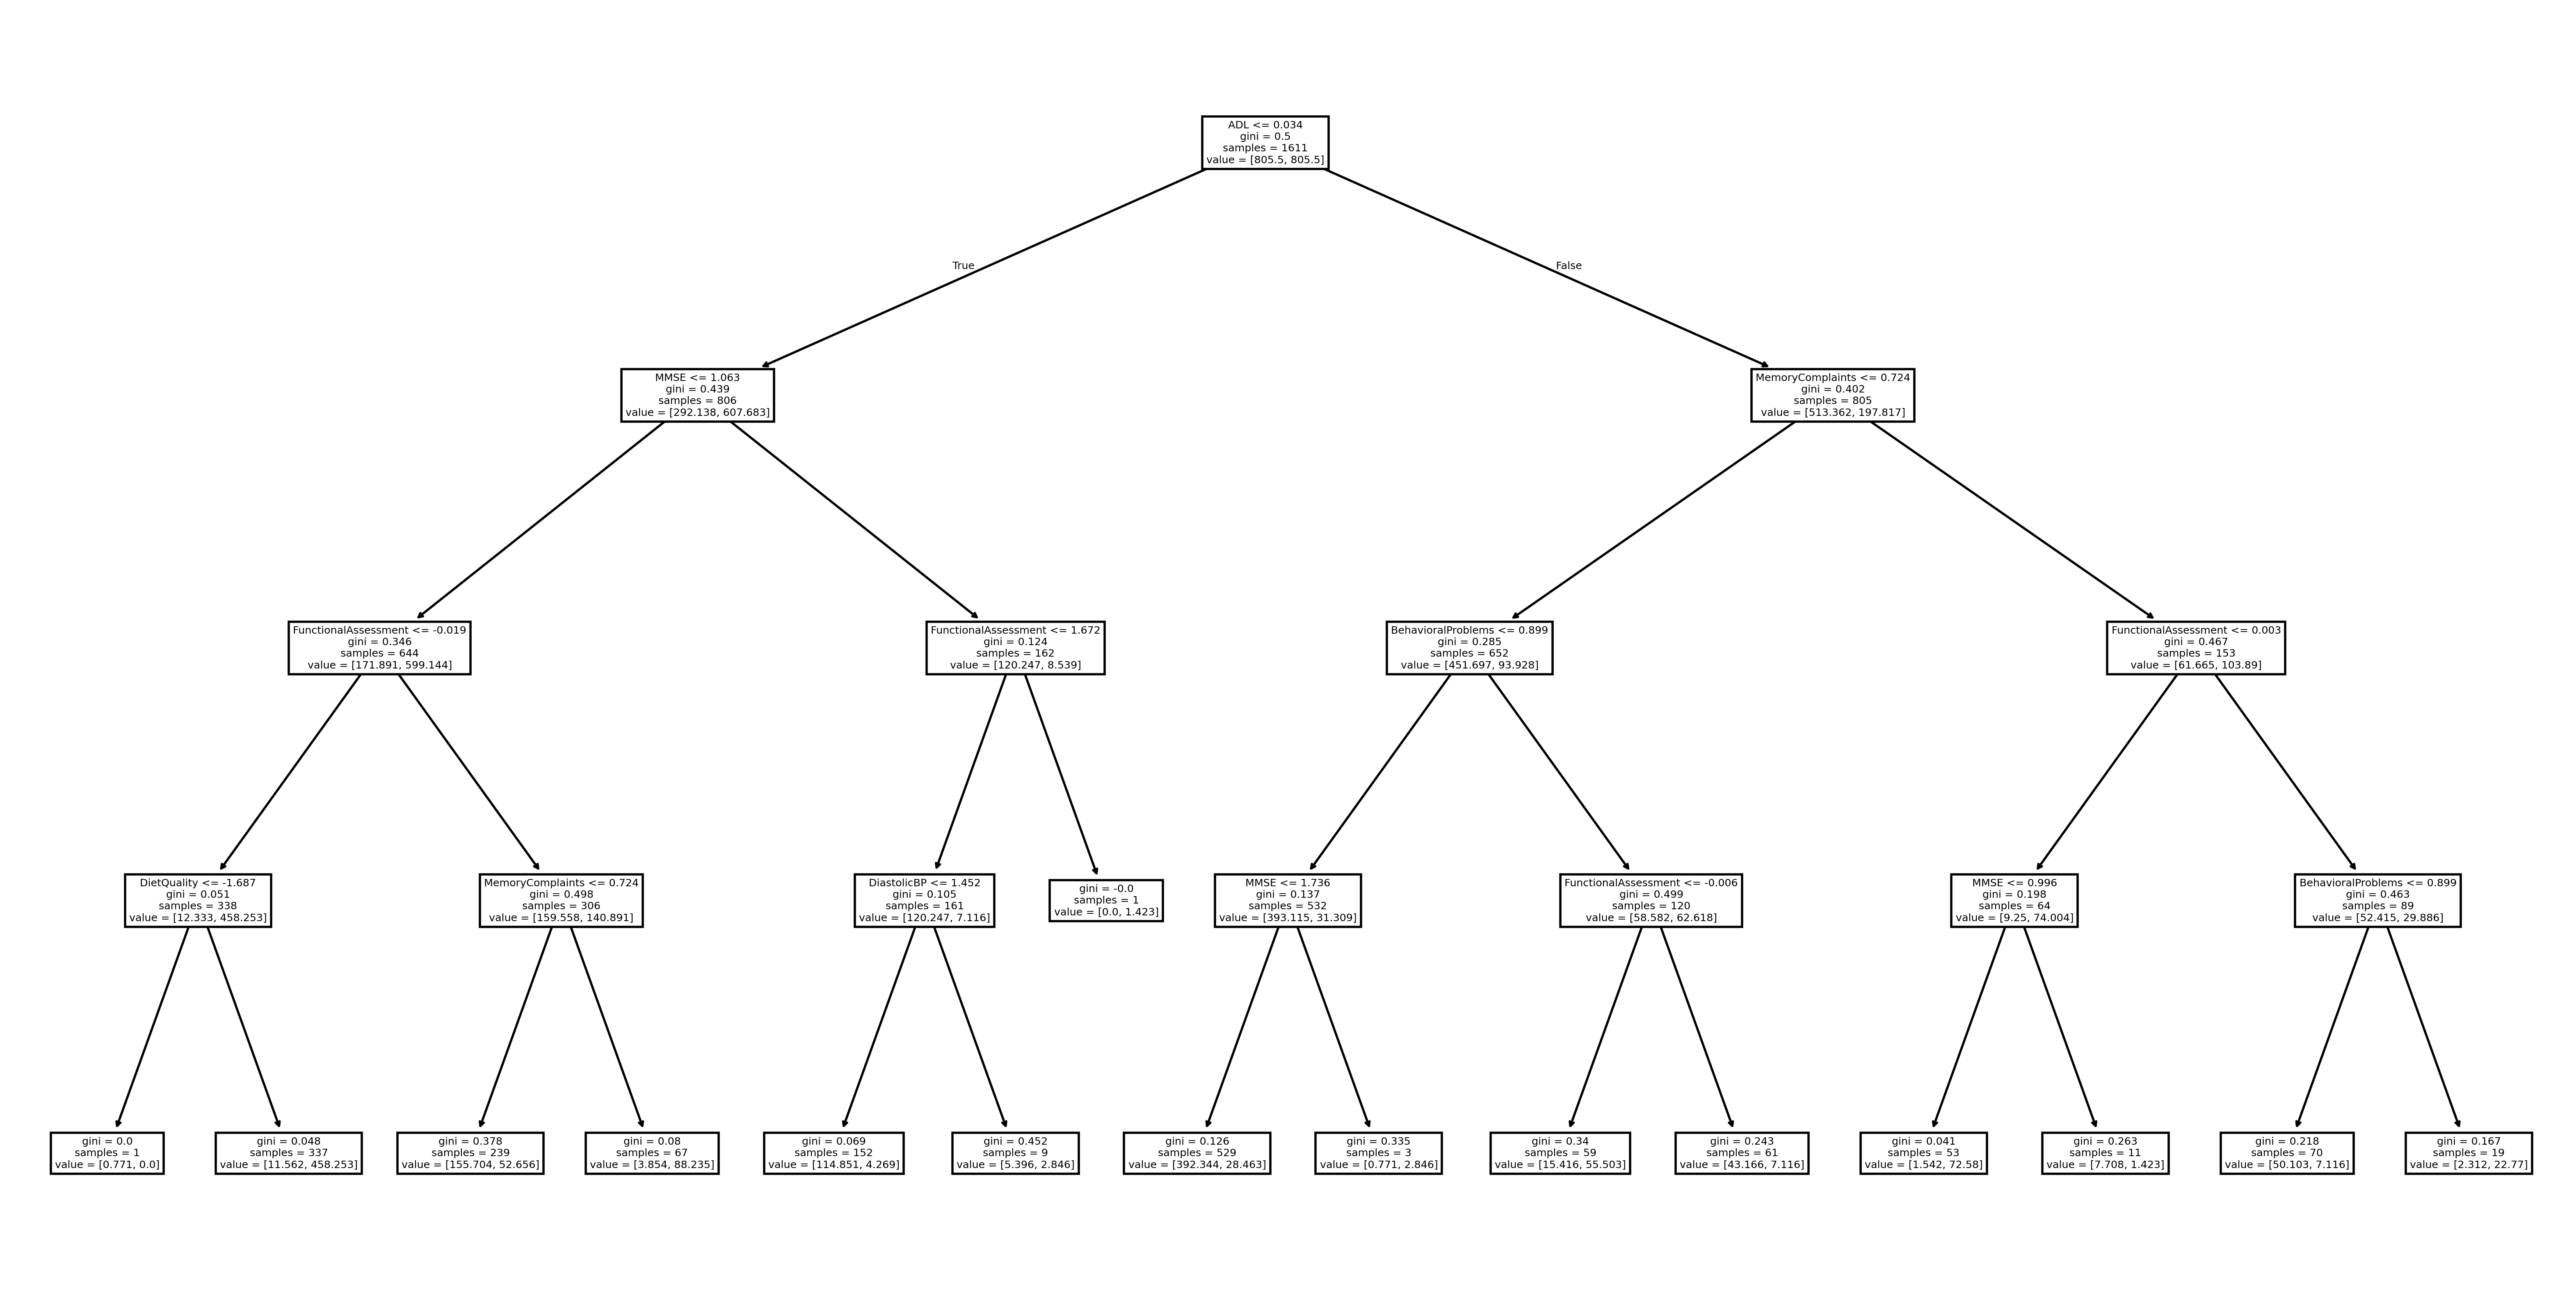

In [ ]:
plt.figure(figsize =(20,10), dpi=400)
plot_tree(tree, feature_names = x.columns)

In [ ]:
y_pred = tree.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[335,   9],
       [ 22, 172]])

In [ ]:
accuracy_score(y_test, y_pred)*100

94.23791821561338